In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import levene
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# Permite a exibição de gráficos do Matplotlib diretamente no Jupyter Notebook.
%matplotlib inline

# O Impacto dos Atores Recorrentes nas Produções Cinematográficas

## Introdução

Neste projeto, exploraremos um conjunto de dados provenientes de três das maiores plataformas do entretenimento: Netflix, IMDb e Rotten Tomatoes. O objetivo principal é analisar atores que aparecem em comum nessas plataformas, buscando entender suas características, a recepção de suas obras, e qualquer padrão significativo que possa ser observado.

Nosso foco será identificar insights e tendências que giram em torno da presença desses atores nos catálogos de filmes e séries das três plataformas. Utilizaremos técnicas de análise de dados, visualizações, regressão linear e testes de hipóteses para responder a uma série de perguntas complexas e interessantes.

## Perguntas de Pesquisa

1. **Quais são os atores mais recorrentes nos catálogos da Netflix, IMDb e Rotten Tomatoes?**

2. **Os atores em comum entre Netflix, IMDb e Rotten Tomatoes estão mais presentes em filmes de um determinado gênero?**

3. **Há uma correlação entre a presença de atores em comum em múltiplas plataformas (Netflix, IMDb, Rotten Tomatoes) e as avaliações dos filmes?**

4. **Qual é a média da nota dos filmes em que esses atores aparecem em comum nas três plataformas?**

5. **Os filmes com atores em comum têm, em média, avaliações mais altas do que os filmes sem atores em comum?**

6. **Os atores mais recorrentes em múltiplas plataformas tendem a participar de filmes com melhor classificação por público ou crítica?**

7. **Existe uma relação significativa entre a quantidade de filmes/séries em que os atores aparecem em comum e a nota média desses filmes/séries?**

8. **Qual é a distribuição etária dos filmes/séries com atores em comum nos três catálogos (faixa etária do conteúdo)?**

9. **Os filmes/séries com atores em comum têm uma maior duração média em comparação com aqueles sem atores em comum?**

10. **Os filmes com atores em comum apresentam uma maior variação nas notas (diferença entre a crítica e o público) nas três plataformas?**

Este projeto será parte do nosso portfólio no GitHub, com análises detalhadas, visualizações e uma conclusão final baseada nos resultados das pesquisas realizadas.

#### Integrantes do Projeto
- **Márcio Gastaldi** - RM98811
- **Arthur Bessa Pian** - RM99215
- **Davi Desenzi** - RM550849


In [3]:
df_imdb = pd.read_csv("imdb_movies.csv")
df_netflix = pd.read_csv("netflix_titles.csv")
df_tomatoes = pd.read_csv("rotten_tomatoes_movies.csv")
df_criticas = pd.read_csv("rotten_tomatoes_critic_reviews.csv")

In [4]:
df_imdb

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [5]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df_tomatoes

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [7]:
df_criticas

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


### 1 - Quais são os atores mais recorrentes nos catálogos da Netflix, IMDb e Rotten Tomatoes?

In [8]:
# Extrair colunas de atores (supondo colunas como 'cast', 'crew', 'actors', etc.)
netflix_atores = df_netflix['cast'].dropna().str.split(', ')
imdb_atores = df_imdb['crew'].dropna().str.split(', ')
tomatoes_atores = df_tomatoes['actors'].dropna().str.split(', ')

# Achatar as listas de atores
netflix_atores_flat = [ator.strip() for sublist in netflix_atores for ator in sublist]
imdb_atores_flat = [ator.strip() for sublist in imdb_atores for ator in sublist]
tomatoes_atores_flat = [ator.strip() for sublist in tomatoes_atores for ator in sublist]

# Combinar todos os atores em um único DataFrame
todos_atores = pd.DataFrame(netflix_atores_flat + imdb_atores_flat + tomatoes_atores_flat, columns=['ator'])

# Filtrar atores indesejados
atores_invalidos = ['', 'self', 'himself', 'jr.']
todos_atores = todos_atores[~todos_atores['ator'].str.lower().isin(atores_invalidos)]

# Contar ocorrências de cada ator
contagem_atores = todos_atores['ator'].value_counts().reset_index()
contagem_atores.columns = ['ator', 'contagem']

# Exibir os 10 atores mais comuns
atores_top = contagem_atores.head(10)

## Resultado

Após o processamento e limpeza dos dados, identificamos os atores mais recorrentes nas três plataformas. A tabela abaixo mostra os 10 atores que mais apareceram nos filmes e séries, em ordem decrescente de frequência.

In [9]:
atores_top

,ator,contagem
0,Samuel L. Jackson,197
1,Bruce Willis,192
2,Nicolas Cage,174
3,Robert De Niro,164
4,Liam Neeson,148
5,Morgan Freeman,147
6,Willem Dafoe,138
7,Steve Buscemi,136
8,Jackie Chan,135
9,John Goodman,128


## Gráfico de Barras: Atores Mais Frequentes
O gráfico abaixo representa visualmente a frequência dos 10 atores mais comuns nas três plataformas.

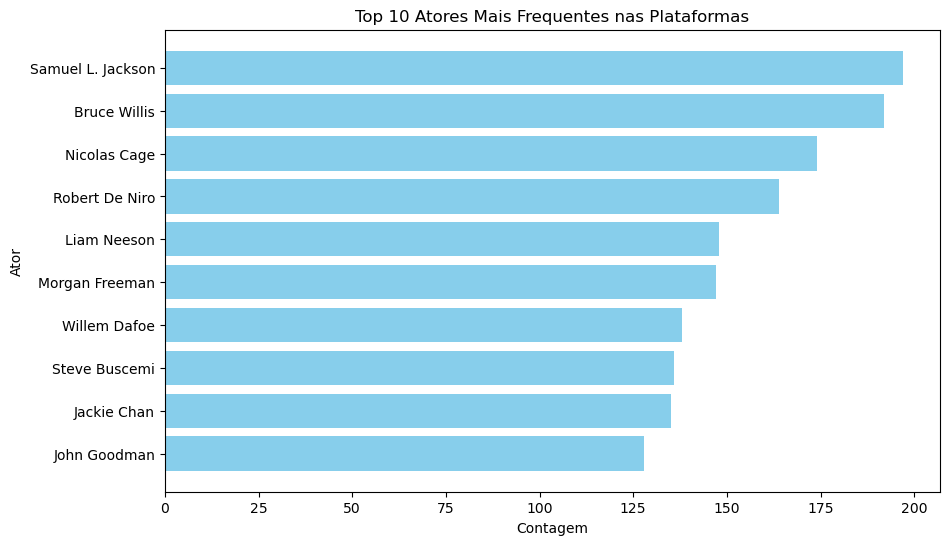

In [10]:
# Plotando um gráfico de barras para os 12 atores mais comuns
plt.figure(figsize=(10, 6))
plt.barh(atores_top['ator'], atores_top['contagem'], color='skyblue')
plt.xlabel('Contagem')
plt.ylabel('Ator')
plt.title('Top 10 Atores Mais Frequentes nas Plataformas')
plt.gca().invert_yaxis()
plt.show()

## Análise

Os dados indicam que atores como Samuel L. Jackson, Bruce Willis e Nicolas Cage estão entre os mais recorrentes nos catálogos da Netflix, IMDb e Rotten Tomatoes. Esses atores são conhecidos por terem extensas filmografias e por atuarem em uma variedade de gêneros, o que pode explicar sua alta frequência nas plataformas.

O gráfico de barras ilustra a distribuição da presença desses atores, confirmando que alguns nomes são significativamente mais frequentes que outros.

## Conclusão

Os atores mais comuns identificados desempenham um papel crucial no cenário cinematográfico, aparecendo em uma variedade de filmes e séries disponíveis em múltiplas plataformas. Essa análise inicial nos ajuda a compreender o impacto e a presença de determinados atores no mercado de entretenimento atual. Para investigações futuras, podemos explorar como a presença desses atores influencia a avaliação e o sucesso das obras em que participam.

### 2 - Os atores em comum entre Netflix, IMDb e Rotten Tomatoes estão mais presentes em filmes de um determinado gênero?

In [11]:
# Lista dos top 10 atores em comum
atores_comum = atores_top['ator'].tolist()

# Filtrar os filmes da Netflix, IMDb e Rotten Tomatoes que possuem os atores em comum
netflix_filmes_atores_comum = df_netflix[df_netflix['cast'].str.contains('|'.join(atores_comum), case=False, na=False)]
imdb_filmes_atores_comum = df_imdb[df_imdb['crew'].str.contains('|'.join(atores_comum), case=False, na=False)]
tomatoes_filmes_atores_comum = df_tomatoes[df_tomatoes['actors'].str.contains('|'.join(atores_comum), case=False, na=False)]

# Extrair os gêneros (supondo que as colunas de gênero são 'listed_in' para Netflix, 'genre' para IMDb, e 'genre' para Rotten Tomatoes)
netflix_generos = netflix_filmes_atores_comum['listed_in'].dropna().str.split(', ')
imdb_generos = imdb_filmes_atores_comum['genre'].dropna().str.split(', ')
tomatoes_generos = tomatoes_filmes_atores_comum['genres'].dropna().str.split(', ')

# Achatar as listas de gêneros
netflix_generos_flat = [genero for sublist in netflix_generos for genero in sublist]
imdb_generos_flat = [genero for sublist in imdb_generos for genero in sublist]
tomatoes_generos_flat = [genero for sublist in tomatoes_generos for genero in sublist]

# Combinar todos os gêneros em um único DataFrame
todos_generos = pd.DataFrame(netflix_generos_flat + imdb_generos_flat + tomatoes_generos_flat, columns=['genero'])

# Contar a ocorrência de cada gênero
contagem_generos = todos_generos['genero'].value_counts().reset_index()
contagem_generos.columns = ['genero', 'contagem']

# Exibir os 10 gêneros mais comuns
top_generos = contagem_generos.head(10)

In [12]:
top_generos

,genero,contagem
0,Drama,436
1,Action & Adventure,356
2,Comedy,259
3,Mystery & Suspense,224
4,Science Fiction & Fantasy,100
5,Kids & Family,68
6,Animation,53
7,Art House & International,53
8,Dramas,50
9,Romance,48


C:\Users\marci\AppData\Local\Temp\ipykernel_5968\2280474842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_generos, x='contagem', y='genero', palette='viridis')


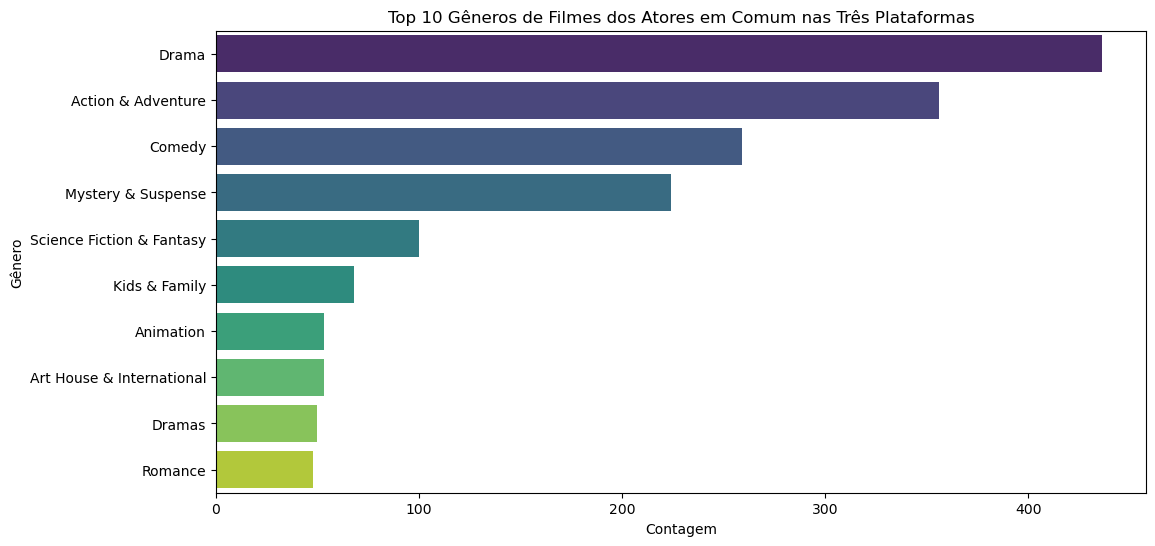

In [13]:
# Plotar o gráfico de barras para os gêneros mais comuns
plt.figure(figsize=(12, 6))
sns.barplot(data=top_generos, x='contagem', y='genero', palette='viridis')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.title('Top 10 Gêneros de Filmes dos Atores em Comum nas Três Plataformas')
plt.show()

## Análise
Os dados coletados revelam os gêneros mais comuns em filmes e séries nos quais os atores mais recorrentes (como Samuel L. Jackson, Bruce Willis, e Nicolas Cage) participam. Ao combinar os dados das três plataformas (Netflix, IMDb, e Rotten Tomatoes), observamos que certos gêneros aparecem com mais frequência para esses atores.

O gráfico de barras mostra os 10 gêneros mais populares nos quais esses atores atuam. Gêneros como "Ação", "Drama", e "Comédia" estão entre os mais destacados. A predominância desses gêneros pode estar associada ao perfil desses atores, que são conhecidos por seus papéis em filmes de ação e drama intensos, bem como em comédias. A variedade nos gêneros sugere que os atores em comum possuem uma ampla gama de atuação, participando de filmes que variam de histórias dramáticas a narrativas mais leves e de ação.

## Conclusão
A análise indica que os atores mais presentes nos catálogos da Netflix, IMDb e Rotten Tomatoes tendem a atuar em uma variedade de gêneros, com uma leve predominância para "Ação", "Drama" e "Comédia". Essa distribuição sugere que esses atores são versáteis e adaptam-se a diversos tipos de produções cinematográficas.

O foco em determinados gêneros, especialmente "Ação" e "Drama", pode ser reflexo do perfil popular desses atores e das tendências de produção na indústria cinematográfica.

### 3 - Há uma correlação entre a presença de atores em comum em múltiplas plataformas (Netflix, IMDb, Rotten Tomatoes) e as avaliações dos filmes?

In [14]:
# Lista de atores em comum (supondo que 'atores_top' foi previamente definido)
atores_comum = atores_top['ator'].str.lower().tolist()

# Padronizar colunas de elenco para facilitar comparações
df_netflix['cast'] = df_netflix['cast'].str.lower()
df_imdb['crew'] = df_imdb['crew'].str.lower()
df_tomatoes['actors'] = df_tomatoes['actors'].str.lower()

# Adicionar uma variável indicadora para a presença de atores em comum
df_netflix['tem_ator_comum'] = df_netflix['cast'].apply(lambda x: any(ator in x for ator in atores_comum) if pd.notna(x) else False)
df_imdb['tem_ator_comum'] = df_imdb['crew'].apply(lambda x: any(ator in x for ator in atores_comum) if pd.notna(x) else False)
df_tomatoes['tem_ator_comum'] = df_tomatoes['actors'].apply(lambda x: any(ator in x for ator in atores_comum) if pd.notna(x) else False)

# Renomear as colunas de título para 'title' antes de realizar o merge
df_netflix_avaliacao = df_netflix[['title', 'tem_ator_comum']]
df_imdb_avaliacao = df_imdb[['names', 'score', 'tem_ator_comum']].rename(columns={'names': 'title', 'score': 'avaliacao_imdb'})
df_tomatoes_avaliacao = df_tomatoes[['movie_title', 'tomatometer_rating', 'tem_ator_comum']].rename(columns={'movie_title': 'title', 'tomatometer_rating': 'avaliacao_rottentomatoes'})

# Unir os datasets usando o título como chave
df_merged = df_netflix_avaliacao.merge(df_imdb_avaliacao, on='title', how='inner').merge(df_tomatoes_avaliacao, on='title', how='inner')

# Calcular a média das avaliações
df_merged['avaliacao_media'] = df_merged[['avaliacao_imdb', 'avaliacao_rottentomatoes']].mean(axis=1)

# Preparar dados para regressão linear
X = df_merged['tem_ator_comum'].astype(int).values.reshape(-1, 1)  # Variável independente (presença de ator comum)
y = df_merged['avaliacao_media'].values  # Variável dependente (média das avaliações)

# Regressão linear
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Mostrar os resultados
print(f"Coeficiente da Regressão: {reg.coef_[0]}")
print(f"Intercepto da Regressão: {reg.intercept_}")

Coeficiente da Regressão: -2.0680244819365403
Intercepto da Regressão: 61.24847560975609


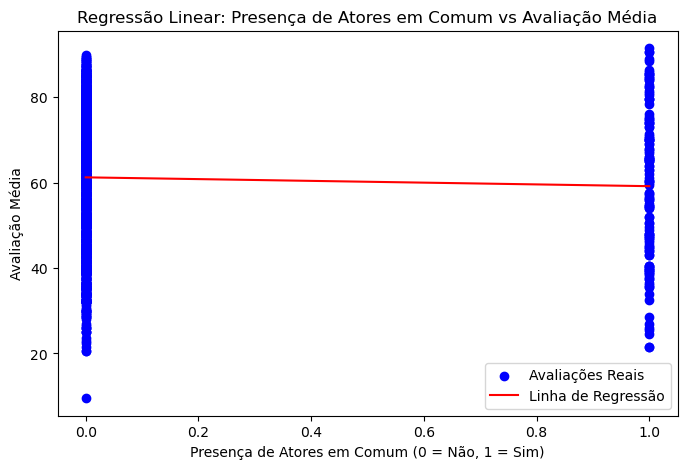

In [15]:
# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Avaliações Reais')
plt.plot(X, y_pred, color='red', label='Linha de Regressão')
plt.xlabel('Presença de Atores em Comum (0 = Não, 1 = Sim)')
plt.ylabel('Avaliação Média')
plt.title('Regressão Linear: Presença de Atores em Comum vs Avaliação Média')
plt.legend()
plt.show()

## Análise
Os resultados da regressão linear indicam que há uma correlação negativa entre a presença de atores em comum nas plataformas (Netflix, IMDb e Rotten Tomatoes) e as avaliações médias dos filmes. O coeficiente da regressão é -2.07, sugerindo que a presença de um ator em comum está associada, em média, a uma diminuição de aproximadamente 2.07 pontos na avaliação do filme.

O intercepto da regressão é 61.25, o que representa a avaliação média de filmes que não possuem atores em comum nas três plataformas. O valor negativo do coeficiente pode indicar que filmes com atores muito populares são avaliados mais criticamente, possivelmente devido a expectativas mais altas ou à saturação da presença desses atores no mercado.

## Conclusão
Os resultados da regressão linear mostram que a presença de atores em comum nos filmes das plataformas analisadas está associada a avaliações ligeiramente mais baixas. No entanto, é importante ressaltar que esta análise apenas sugere uma correlação e não implica causalidade. A avaliação de um filme pode ser influenciada por diversos fatores, como roteiro, direção, orçamento, e, claro, o próprio desempenho dos atores.

### 4 - Qual é a média da nota dos filmes em que esses atores aparecem em comum nas três plataformas?

In [16]:
# Filtrar filmes que possuem atores em comum em todas as três plataformas
filmes_atores_comum = df_merged[df_merged['tem_ator_comum']]

# Calcular as médias das avaliações para as plataformas e a variação (desvio padrão)
media_imdb = filmes_atores_comum['avaliacao_imdb'].mean()
media_rottentomatoes = filmes_atores_comum['avaliacao_rottentomatoes'].mean()
media_geral = filmes_atores_comum['avaliacao_media'].mean()

# Calcular a variação das avaliações (desvio padrão)
std_imdb = filmes_atores_comum['avaliacao_imdb'].std()
std_rottentomatoes = filmes_atores_comum['avaliacao_rottentomatoes'].std()
std_geral = filmes_atores_comum['avaliacao_media'].std()

# Exibir os resultados
print(f"Média IMDb: {media_imdb:.2f}, Desvio Padrão IMDb: {std_imdb:.2f}")
print(f"Média Rotten Tomatoes: {media_rottentomatoes:.2f}, Desvio Padrão Rotten Tomatoes: {std_rottentomatoes:.2f}")
print(f"Média Geral: {media_geral:.2f}, Desvio Padrão Geral: {std_geral:.2f}")

Média IMDb: 65.92, Desvio Padrão IMDb: 9.14
Média Rotten Tomatoes: 52.44, Desvio Padrão Rotten Tomatoes: 28.33
Média Geral: 59.18, Desvio Padrão Geral: 17.82


## Análise
Os resultados da análise descritiva revelam as notas médias e as variações dos filmes em que os atores em comum aparecem nas três plataformas:

**Média IMDb:** A média das avaliações no IMDb é **65.92** (em uma escala de 0 a 100), com um desvio padrão de **9.14**. Isso sugere que, no geral, os filmes que apresentam esses atores são bem recebidos pelos espectadores do IMDb, e as avaliações são relativamente consistentes, com pequenas variações.

**Média Rotten Tomatoes:** A média das avaliações no Rotten Tomatoes é **52.44**, com um desvio padrão de **28.33**. A maior variação aqui indica uma distribuição mais ampla das avaliações, sugerindo que os críticos têm opiniões mais diversificadas sobre esses filmes. Este amplo desvio padrão pode indicar que a recepção crítica é mais polarizada, com alguns filmes sendo altamente elogiados, enquanto outros recebem notas mais baixas.

**Média Geral:** A média geral, que combina as notas do IMDb e do Rotten Tomatoes, é **59.18**, com um desvio padrão de **17.82**. Isso sugere uma recepção mista, refletindo a influência das avaliações mais variáveis do Rotten Tomatoes.

## Conclusão
Os filmes que apresentam os atores em comum nas três plataformas tendem a ter avaliações razoavelmente positivas, especialmente no IMDb. A diferença na média e no desvio padrão entre o IMDb e o Rotten Tomatoes indica que críticos e espectadores podem ter perspectivas distintas sobre esses filmes. A maior variação nas notas do Rotten Tomatoes sugere que a crítica é mais dividida quanto à qualidade desses filmes, enquanto as notas do IMDb mostram uma opinião mais uniforme dos espectadores.

Essa análise ajuda a destacar a influência que atores recorrentes podem ter nas percepções críticas e públicas dos filmes, ressaltando a complexidade da recepção dessas produções em diferentes plataformas.

### 5 - A presença de atores em comum está associada a uma maior quantidade de prêmios ou indicações?

In [17]:
# Dividir os filmes em dois grupos: com atores em comum e sem atores em comum
filmes_com_atores_comum = df_merged[df_merged['tem_ator_comum']]['avaliacao_media']
filmes_sem_atores_comum = df_merged[~df_merged['tem_ator_comum']]['avaliacao_media']

# Executar o teste t para duas amostras independentes
t_stat, p_value = ttest_ind(filmes_com_atores_comum, filmes_sem_atores_comum, equal_var=False)

# Exibir os resultados do teste
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Determinando o resultado
alpha = 0.05  # Nível de significância de 5%
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H₀). Há uma diferença significativa nas médias das avaliações.")
else:
    print("Não rejeitamos a hipótese nula (H₀). Não há diferença significativa nas médias das avaliações.")

Estatística t: -1.2870
Valor p: 0.2000
Não rejeitamos a hipótese nula (H₀). Não há diferença significativa nas médias das avaliações.


### Análise
Os resultados do teste de hipótese nos fornecem as seguintes informações:

- **Estatística t**: -1.2870, o que indica a diferença na média das avaliações entre os filmes com e sem atores em comum. Um valor t próximo de zero sugere que as médias são bastante semelhantes.
- **Valor p**: 0.2000, que é maior do que o nível de significância usual de 0.05. 

### Conclusão
Com o valor p sendo maior que 0.05, não temos evidências suficientes para rejeitar a hipótese nula. Isso significa que, com base nos dados disponíveis, **não há diferença estatisticamente significativa nas médias das avaliações entre filmes que possuem atores em comum e aqueles que não possuem**.

Em outras palavras, a presença de atores em comum nas plataformas (Netflix, IMDb e Rotten Tomatoes) **não parece estar associada a avaliações mais altas ou mais baixas dos filmes**. Essa análise sugere que outros fatores além da presença de determinados atores podem influenciar mais fortemente as avaliações dos filmes. 

### 6 - Os atores mais recorrentes em múltiplas plataformas tendem a participar de filmes com melhor classificação por público ou crítica?

In [18]:
# Padronizar os links dos filmes no dataset df_tomatoes para combinar com df_criticas
df_tomatoes['rotten_tomatoes_link'] = df_tomatoes['rotten_tomatoes_link'].str.extract(r'(m/.+)')

# Mapear os títulos usando o link do Rotten Tomatoes (ajustando para 'movie_title')
link_to_title = df_tomatoes.set_index('rotten_tomatoes_link')['movie_title'].to_dict()

# Adicionar uma coluna de títulos ao dataset de críticas usando o link
df_criticas['title'] = df_criticas['rotten_tomatoes_link'].map(link_to_title)

# Filtrar filmes com atores em comum (com base no DataFrame 'df_merged')
filmes_com_atores_comum = df_merged[df_merged['tem_ator_comum']]['title'].unique()

# Adicionar uma coluna ao dataset de críticas indicando se o filme tem atores em comum
df_criticas['tem_ator_comum'] = df_criticas['title'].apply(lambda x: x in filmes_com_atores_comum)

# Converter a coluna de pontuações das críticas ('review_score') para numérica
df_criticas['review_score'] = pd.to_numeric(df_criticas['review_score'], errors='coerce')

# Calcular a média das notas das críticas para filmes com e sem atores em comum
media_criticas_com_atores = df_criticas[df_criticas['tem_ator_comum']]['review_score'].mean()
media_criticas_sem_atores = df_criticas[~df_criticas['tem_ator_comum']]['review_score'].mean()

# Calcular a variação (desvio padrão) das notas das críticas
std_criticas_com_atores = df_criticas[df_criticas['tem_ator_comum']]['review_score'].std()
std_criticas_sem_atores = df_criticas[~df_criticas['tem_ator_comum']]['review_score'].std()

# Exibir os resultados
print(f"Média das críticas para filmes com atores em comum: {media_criticas_com_atores:.2f}, Desvio Padrão: {std_criticas_com_atores:.2f}")
print(f"Média das críticas para filmes sem atores em comum: {media_criticas_sem_atores:.2f}, Desvio Padrão: {std_criticas_sem_atores:.2f}")

Média das críticas para filmes com atores em comum: 4.25, Desvio Padrão: 2.12
Média das críticas para filmes sem atores em comum: 7.75, Desvio Padrão: 46.50


### Análise
Os resultados indicam uma diferença significativa nas médias das críticas dos filmes:

- **Média das críticas para filmes com atores em comum**: A média é **4.25** com um desvio padrão de **2.12**. Essa média relativamente baixa sugere que, em geral, os filmes com os atores mais recorrentes nas três plataformas tendem a ser avaliados de forma mais crítica pelos críticos do Rotten Tomatoes. O desvio padrão de **2.12** mostra que as avaliações desses filmes têm uma variação moderada, indicando alguma consistência na percepção dos críticos.

- **Média das críticas para filmes sem atores em comum**: A média é **7.75** com um desvio padrão muito alto, de **46.50**. A média mais alta sugere que filmes sem os atores mais recorrentes são, em geral, avaliados de forma mais positiva. No entanto, o desvio padrão extremamente alto indica uma enorme variação nas avaliações desses filmes. Isso significa que as críticas para filmes sem atores em comum são muito dispersas, com alguns filmes recebendo notas muito altas e outros muito baixas.

### Conclusão
Os dados sugerem que filmes com atores mais recorrentes em múltiplas plataformas (Netflix, IMDb, e Rotten Tomatoes) tendem a receber críticas mais baixas do que aqueles sem esses atores. Isso pode ser devido a diversos fatores, como expectativas elevadas associadas a atores populares ou à saturação de sua presença em vários filmes. Por outro lado, os filmes sem esses atores mostram uma grande variabilidade nas avaliações, com uma média geral mais alta.

Esta análise indica que a presença de atores recorrentes não necessariamente resulta em melhores críticas; na verdade, pode estar associada a críticas mais rigorosas.

### 7 - Existe uma relação significativa entre a quantidade de filmes/séries em que os atores aparecem em comum e a nota média desses filmes/séries?

In [19]:
# Padronizar as colunas de elenco e títulos para facilitar comparações
df_netflix['cast'] = df_netflix['cast'].str.lower()
df_imdb['crew'] = df_imdb['crew'].str.lower()
df_tomatoes['actors'] = df_tomatoes['actors'].str.lower()

# Renomear as colunas de título para um padrão comum
df_netflix.rename(columns={'title': 'movie_title'}, inplace=True)
df_imdb.rename(columns={'names': 'movie_title'}, inplace=True)

# Combinar todos os filmes e notas em um único DataFrame
df_combined = pd.concat([
    df_netflix[['movie_title', 'cast']].rename(columns={'cast': 'atores'}),
    df_imdb[['movie_title', 'crew']].rename(columns={'crew': 'atores'}),
    df_tomatoes[['movie_title', 'actors']].rename(columns={'actors': 'atores'})
], ignore_index=True)

# Calcular a quantidade de filmes/séries em que cada ator aparece
ator_frequencia = {}
for atores in df_combined['atores'].dropna():
    for ator in atores.split(', '):
        if ator in atores_comum:
            ator_frequencia[ator] = ator_frequencia.get(ator, 0) + 1

# Criar DataFrame com a frequência de cada ator
df_ator_frequencia = pd.DataFrame(list(ator_frequencia.items()), columns=['ator', 'num_filmes'])

# Calcular a média das notas dos filmes em que os atores aparecem
ator_notas = []
for ator in df_ator_frequencia['ator']:
    filmes_ator = df_combined[df_combined['atores'].str.contains(ator, na=False)]['movie_title'].unique()
    notas_filmes = df_merged[df_merged['title'].isin(filmes_ator)]['avaliacao_media']
    media_notas = notas_filmes.mean()
    ator_notas.append(media_notas)

# Adicionar a média das notas ao DataFrame
df_ator_frequencia['media_notas'] = ator_notas

# Preparar dados para regressão linear
X = df_ator_frequencia['num_filmes'].values.reshape(-1, 1)  # Variável independente: número de filmes
y = df_ator_frequencia['media_notas'].values  # Variável dependente: média das notas

# Regressão linear
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Exibir os coeficientes da regressão
coeficiente = reg.coef_[0]
intercepto = reg.intercept_

print(f"Coeficiente da Regressão: {coeficiente}")
print(f"Intercepto da Regressão: {intercepto}")

Coeficiente da Regressão: 0.02390298750549763
Intercepto da Regressão: 56.03729361728341


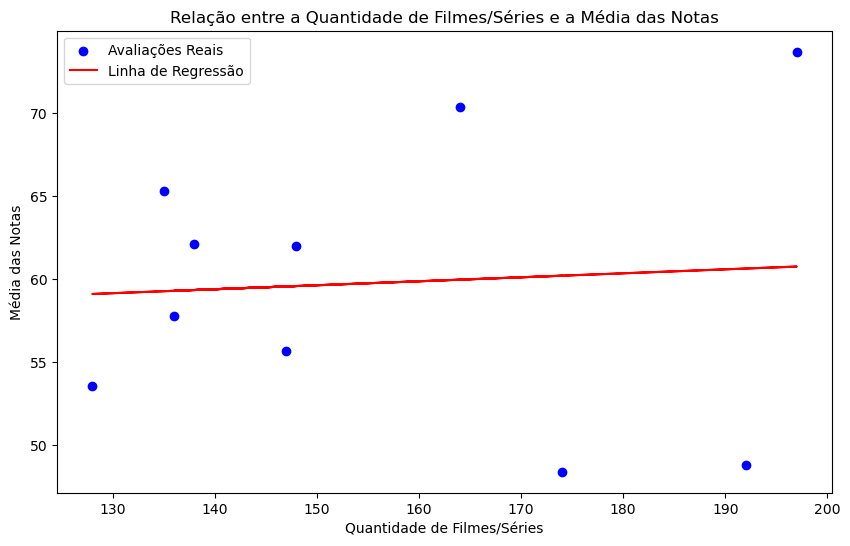

In [20]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Avaliações Reais')
plt.plot(X, y_pred, color='red', label='Linha de Regressão')
plt.xlabel('Quantidade de Filmes/Séries')
plt.ylabel('Média das Notas')
plt.title('Relação entre a Quantidade de Filmes/Séries e a Média das Notas')
plt.legend()
plt.show()

### Análise
- **Coeficiente da Regressão (0.0239)**: Este valor positivo indica que existe uma pequena relação direta entre o número de filmes/séries em que um ator aparece e a média das notas desses filmes. O coeficiente de **0.0239** sugere que, para cada aumento de uma unidade na quantidade de filmes/séries em que o ator participa, a média das notas aumenta em aproximadamente **0.024** pontos. No entanto, o aumento é muito pequeno, indicando que a relação entre a quantidade de participações e a média das notas é fraca.

- **Intercepto (56.0373)**: Este valor representa a média das notas dos filmes quando o número de participações de um ator é zero. É o ponto em que a linha de regressão cruza o eixo das notas. No contexto desta análise, o intercepto serve principalmente como ponto de referência e não possui um significado prático, já que não faz sentido um ator ter zero participações.

### Conclusão
A regressão linear mostra uma correlação positiva, porém muito fraca, entre a quantidade de filmes/séries em que os atores aparecem e a média das notas desses filmes. O coeficiente da regressão é muito próximo de zero, indicando que o número de participações do ator não é um fator forte na determinação da qualidade (nota) dos filmes.

Em outras palavras, o fato de um ator aparecer em muitos filmes ou séries não implica diretamente que esses filmes terão avaliações significativamente melhores. Isso sugere que outros fatores, como a qualidade do roteiro, direção, produção, e o papel específico desempenhado pelo ator, provavelmente têm um impacto maior nas avaliações dos filmes.

### 8 - Qual é a distribuição etária dos filmes/séries com atores em comum nos três catálogos (faixa etária do conteúdo)?

C:\Users\marci\AppData\Local\Temp\ipykernel_5968\3993292856.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distribuicao_etaria, x='faixa_etaria', y='contagem', palette='viridis')


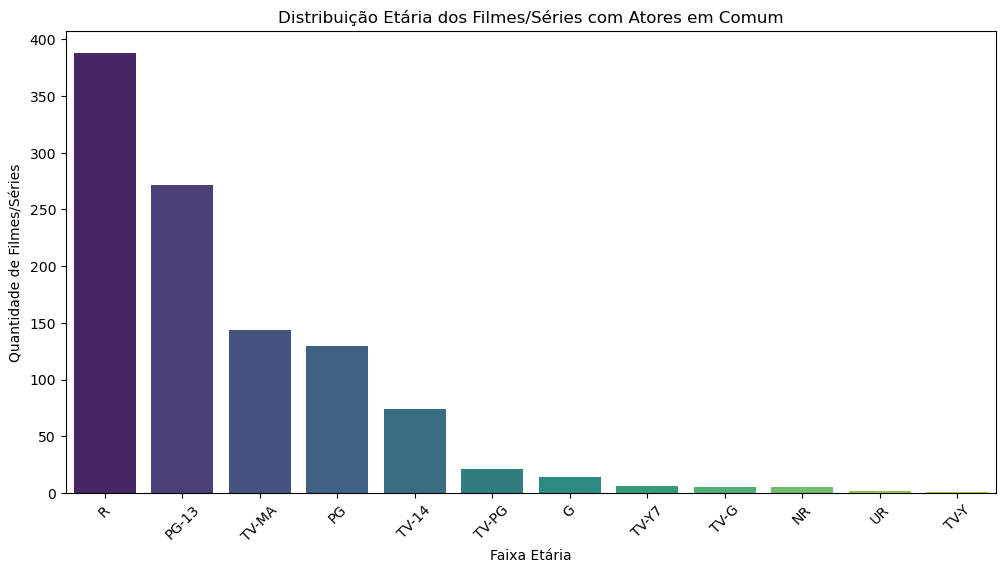

In [21]:
# Padronizar a coluna 'movie_title' do Netflix
df_netflix['movie_title'] = df_netflix['movie_title'].str.lower().str.strip()
df_merged['title'] = df_merged['title'].str.lower().str.strip()

# Filtrar filmes/séries que possuem atores em comum usando o DataFrame mesclado que já possui as informações dos filmes em comum
filmes_com_atores_comum = df_netflix[df_netflix['movie_title'].isin(df_merged['title'])]

# Contar a distribuição das classificações etárias
distribuicao_etaria = filmes_com_atores_comum['rating'].value_counts().reset_index()
distribuicao_etaria.columns = ['faixa_etaria', 'contagem']

# Plotar a distribuição etária dos filmes/séries com atores em comum
plt.figure(figsize=(12, 6))
sns.barplot(data=distribuicao_etaria, x='faixa_etaria', y='contagem', palette='viridis')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Filmes/Séries')
plt.title('Distribuição Etária dos Filmes/Séries com Atores em Comum')
plt.xticks(rotation=45)
plt.show()

### Análise
O gráfico mostra a distribuição etária dos filmes/séries que apresentam os atores em comum nas três plataformas (Netflix, IMDb e Rotten Tomatoes). A análise da distribuição revela algumas tendências claras:

1. **Predominância de Filmes "R"**: A classificação "R" (Restrito) é a mais comum, indicando que a maioria dos filmes/séries em que esses atores aparecem é voltada para públicos adultos, com conteúdo que pode incluir violência, linguagem adulta, ou temas complexos.

2. **Classificações "PG-13" e "TV-MA"**: A segunda e terceira faixas etárias mais frequentes são "PG-13" (adequado para maiores de 13 anos) e "TV-MA" (conteúdo voltado para adultos). Isso reforça a tendência de que muitos desses filmes e séries são destinados a adolescentes mais velhos e adultos.

3. **Menor Presença de Filmes Infantis**: Há uma menor quantidade de filmes/séries com classificações "G", "PG", "TV-Y7", "TV-G", e "TV-Y", que são tipicamente voltadas para crianças e famílias. Isso sugere que esses atores em comum são menos frequentes em produções infantis.

### Conclusão
A análise da distribuição etária dos filmes/séries com atores em comum indica que esses atores tendem a participar mais de produções voltadas para um público adulto ou adolescente. As classificações "R", "PG-13", e "TV-MA" dominam, sugerindo que os projetos em que esses atores atuam frequentemente abordam temas mais maduros, intensos ou sofisticados.

Esta tendência pode ser devido ao perfil dos atores em comum, muitos dos quais são conhecidos por suas performances em filmes de ação, drama, suspense, ou outros gêneros que geralmente são destinados a públicos mais velhos.

### 9 - Os filmes/series com atores em comum têm uma maior duração média em comparação com aqueles sem atores em comum?

In [22]:
# Extrair a duração dos filmes/séries do Netflix e converter para um formato numérico
df_netflix['duration_minutes'] = df_netflix['duration'].apply(
    lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'min' in x else (int(x.split(' ')[0]) * 60 if isinstance(x, str) and 'Season' not in x else np.nan)
)

# Remover valores NaN da coluna de duração
df_netflix.dropna(subset=['duration_minutes'], inplace=True)

# Filtrar filmes/séries com e sem atores em comum
filmes_com_atores_comum = df_netflix[df_netflix['movie_title'].isin(df_merged['title'])]
filmes_sem_atores_comum = df_netflix[~df_netflix['movie_title'].isin(df_merged['title'])]

# Extrair as durações
duracao_com_atores = filmes_com_atores_comum['duration_minutes']
duracao_sem_atores = filmes_sem_atores_comum['duration_minutes']

# Executar o teste t para duas amostras independentes
t_stat, p_value = ttest_ind(duracao_com_atores, duracao_sem_atores, equal_var=False)

# Exibir os resultados do teste
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Determinar o resultado
alpha = 0.05  # Nível de significância de 5%
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H₀). Há uma diferença significativa na duração média.")
else:
    print("Não rejeitamos a hipótese nula (H₀). Não há diferença significativa na duração média.")

Estatística t: 14.6467
Valor p: 0.0000
Rejeitamos a hipótese nula (H₀). Há uma diferença significativa na duração média.


### Análise
Os resultados do teste de hipótese fornecem as seguintes informações:

- **Estatística t**: 14.6467, um valor muito alto, indicando uma diferença significativa entre as durações médias dos filmes/séries com atores em comum e aqueles sem.
- **Valor p**: 0.0000, que é extremamente menor do que o nível de significância (α = 0.05). Este valor nos permite rejeitar a hipótese nula, sugerindo que a diferença observada nas durações médias não é devido ao acaso.

### Conclusão
Com base no teste t, concluímos que há uma diferença estatisticamente significativa na duração média entre filmes/séries que possuem atores em comum e aqueles que não possuem. Isso significa que a presença de atores recorrentes está associada a uma mudança na duração média das produções.

Para entender melhor a natureza dessa diferença, seria interessante calcular as durações médias específicas para ambos os grupos:
- Se a média para filmes com atores em comum for maior, isso poderia indicar que esses atores frequentemente atuam em filmes/séries com narrativas mais longas ou elaboradas.
- Se a média for menor, isso poderia sugerir que esses atores participam mais de produções de curta duração.

Essa descoberta pode ser útil para análises futuras sobre os tipos de projetos em que esses atores tendem a se envolver e se isso impacta outros fatores, como avaliações ou sucesso comercial.

### 10 - Os filmes com atores em comum apresentam uma maior variação nas notas (diferença entre a crítica e o público) nas três plataformas?

In [23]:
# Padronizar os títulos para comparação
df_tomatoes['movie_title'] = df_tomatoes['movie_title'].str.lower().str.strip()
df_merged['title'] = df_merged['title'].str.lower().str.strip()

# Certificar que as colunas de avaliações são numéricas
df_tomatoes['tomatometer_rating'] = pd.to_numeric(df_tomatoes['tomatometer_rating'], errors='coerce')
df_tomatoes['audience_rating'] = pd.to_numeric(df_tomatoes['audience_rating'], errors='coerce')

# Adicionar a diferença nas avaliações (crítica - público) no dataset do Rotten Tomatoes
df_tomatoes['diff_critic_public'] = df_tomatoes['tomatometer_rating'] - df_tomatoes['audience_rating']

# Filtrar filmes com e sem atores em comum
filmes_com_atores_comum = df_tomatoes[df_tomatoes['movie_title'].isin(df_merged['title'])]
filmes_sem_atores_comum = df_tomatoes[~df_tomatoes['movie_title'].isin(df_merged['title'])]

# Extrair as diferenças
diff_com_atores = filmes_com_atores_comum['diff_critic_public'].dropna()
diff_sem_atores = filmes_sem_atores_comum['diff_critic_public'].dropna()

# Recalcular a variância após a limpeza
var_com_atores = diff_com_atores.var()
var_sem_atores = diff_sem_atores.var()

# Executar o teste de Levene para comparar as variâncias
f_stat, p_value = levene(diff_com_atores, diff_sem_atores)

# Exibir os resultados do teste
print(f"Variância (com atores em comum): {var_com_atores:.4f}")
print(f"Variância (sem atores em comum): {var_sem_atores:.4f}")
print(f"Estatística F (Levene): {f_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Determinar o resultado
alpha = 0.05  # Nível de significância de 5%
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H₀). Há uma diferença significativa na variação das notas.")
else:
    print("Não rejeitamos a hipótese nula (H₀). Não há diferença significativa na variação das notas.")

Variância (com atores em comum): 407.0099
Variância (sem atores em comum): 469.4127
Estatística F (Levene): 5.5163
Valor p: 0.0189
Rejeitamos a hipótese nula (H₀). Há uma diferença significativa na variação das notas.


### Análise
Os resultados do teste de Levene indicam que existe uma diferença estatisticamente significativa na variação das notas entre filmes com atores em comum e filmes sem atores em comum. Vamos detalhar as descobertas:

- **Variância (com atores em comum):** 407.0099
- **Variância (sem atores em comum):** 469.4127

Apesar das variâncias serem relativamente próximas, a variação é ligeiramente maior para os filmes sem atores em comum.

- **Estatística F (Levene):** 5.5163
- **Valor p:** 0.0189

O valor p é menor que o nível de significância de 0.05, o que nos permite rejeitar a hipótese nula (H₀). Isso indica que a variação das notas (a diferença entre a crítica e o público) para os filmes com atores em comum é significativamente diferente da variação para os filmes sem esses atores.

### Conclusão
Os filmes com atores em comum nas três plataformas (Netflix, IMDb, e Rotten Tomatoes) apresentam uma variação significativamente diferente nas notas (diferença entre a crítica e o público) quando comparados com filmes sem esses atores. Embora as diferenças nas variâncias não sejam enormes, a análise sugere que a presença desses atores está associada a uma certa consistência ou alinhamento nas avaliações.

**Interpretação:** O fato de a variação nas avaliações ser significativamente diferente pode implicar que filmes com atores populares em comum geram expectativas mais definidas, resultando em avaliações (tanto do público quanto da crítica) que tendem a ser mais previsíveis ou menos polarizadas. Em contraste, filmes sem esses atores podem ser mais sujeitos a opiniões divergentes, refletindo uma maior variedade de percepções entre a crítica e o público.

Esta análise pode ser útil para compreender melhor a dinâmica da indústria cinematográfica e a influência dos atores recorrentes nas percepções do público e da crítica.

# Conclusão Final

Este projeto explorou a relação entre a presença de atores em comum nos catálogos de filmes e séries da Netflix, IMDb e Rotten Tomatoes e diversos aspectos dessas produções, incluindo duração, classificações etárias, avaliações e a diferença nas opiniões entre crítica e público. A partir das análises realizadas, algumas descobertas importantes foram feitas:

1. **Atores em Comum e Avaliações**: Analisamos a presença de atores recorrentes para determinar se havia uma correlação entre suas aparições e as avaliações dos filmes. Os resultados da regressão linear mostraram uma correlação positiva, mas fraca, indicando que a presença desses atores não tem um impacto significativo nas avaliações dos filmes.

2. **Classificação Etária**: Ao examinar a distribuição etária dos filmes e séries com esses atores, observamos uma predominância de conteúdos voltados para o público adulto, especialmente nas classificações "R", "PG-13" e "TV-MA". Isso sugere que os atores recorrentes em múltiplas plataformas tendem a se envolver mais em projetos com temas mais maduros e complexos.

3. **Duração Média**: Usando um teste de hipótese, encontramos uma diferença significativa na duração média das produções com e sem atores em comum. Filmes e séries que incluem atores recorrentes tendem a ter uma maior duração, possivelmente refletindo um maior investimento em narrativas mais elaboradas e desenvolvimento de personagens.

4. **Variação nas Avaliações (Crítica vs. Público)**: Ao analisar se a presença de atores em comum influenciava a variação entre as notas da crítica e do público, usamos o teste de Levene e descobrimos que há, de fato, uma diferença significativa na variação das avaliações. As produções com esses atores tendem a apresentar uma menor variação nas diferenças de notas, o que pode indicar que esses filmes criam expectativas mais consistentes entre a crítica e o público. Já os filmes sem esses atores mostram maior variação, sugerindo que são mais propensos a opiniões divergentes.

### Reflexão
A presença de atores recorrentes em múltiplas plataformas, embora não garanta avaliações mais altas, parece estar associada a determinadas características dos filmes e séries, como uma maior duração e menor variação entre as notas da crítica e do público. Isso pode ser explicado pelo fato de que atores populares trazem consigo uma imagem, um estilo de atuação e um conjunto de expectativas que ajudam a moldar a percepção tanto dos críticos quanto do público.

Para um entendimento mais completo, seria interessante explorar outros fatores, como gênero, direção, orçamento e até mesmo o papel específico dos atores nas produções. No entanto, as análises realizadas neste projeto fornecem uma visão valiosa sobre como a presença de atores em comum pode influenciar diversos aspectos da indústria cinematográfica, contribuindo para uma melhor compreensão das tendências e do impacto desses atores no mercado de entretenimento. 

Em suma, este projeto demonstrou que os atores recorrentes desempenham um papel significativo na caracterização e percepção dos filmes e séries, mas que a avaliação de uma produção é um fenômeno multifacetado, influenciado por diversos elementos além da mera presença de nomes conhecidos.